In [ ]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
casos_totales = pd.read_csv('https://raw.githubusercontent.com/miguelAfonzalida/TP1-OrgaDatos/master/dataTP1.csv?token=APOYEA5WBVV36FTZG4PM5PS7XK2SI')
casos_totales

In [ ]:
precios_por_oportunidad = pd.read_csv("https://raw.githubusercontent.com/miguelAfonzalida/TP1-OrgaDatos/master/dataTP1.csv?token=APOYEA5WBVV36FTZG4PM5PS7XK2SI", usecols= ['Opportunity_ID','Price','Currency','ASP_Currency','ASP','ASP_(converted)_Currency','ASP_(converted)','Total_Amount_Currency','Total_Amount','Total_Taxable_Amount_Currency','Total_Taxable_Amount','Stage','Region',])
precios_por_oportunidad

In [ ]:
from pandas_profiling import ProfileReport
ProfileReport(precios_por_oportunidad)

In [ ]:
casos_cerrados=precios_por_oportunidad.loc[(precios_por_oportunidad['Stage']!='Proposal')\
                                           & (precios_por_oportunidad['Stage']!='Negotiation')\
                                           & (precios_por_oportunidad['Stage']!='Qualification'),:]
casos_cerrados

In [ ]:
casos_cerrados['ASP_Currency'].value_counts()

Conversion del Total_Amount

In [ ]:
df_para_conversion = casos_cerrados.groupby('Opportunity_ID').agg({'Total_Amount':[sum],\
                                                                   'Total_Taxable_Amount':[max]\
                                                                   ,'ASP':[max],'ASP_(converted)':[max],\
                                                                 'Stage':['max'], 'Region':['max'],})
level0 = df_para_conversion.columns.get_level_values(0)
level1 = df_para_conversion.columns.get_level_values(1)
df_para_conversion.columns = level0
df_para_conversion.reset_index(inplace= True)
df_para_conversion

Datos faltantes para relaizar la conversion

In [ ]:
df_para_conversion = df_para_conversion[(df_para_conversion['ASP'].isna()!= True) &\
                                         (df_para_conversion['ASP_(converted)'].isna()!= True)&
                                          (df_para_conversion['ASP']!= 0) &\
                                         (df_para_conversion['ASP_(converted)'] !=0)] 
df_para_conversion

Casos en los que es mayor el total imponible al total a pagar

In [ ]:
df_para_conversion[df_para_conversion['Total_Amount']<\
                   (df_para_conversion['Total_Taxable_Amount']-0.000001)]

Creacion del Total_Amount_Converted en USD

In [ ]:
df_para_conversion['Total_Amount_Converted'] \
        = df_para_conversion['Total_Amount'] * (df_para_conversion['ASP_(converted)']/df_para_conversion['ASP'])
df_para_conversion

In [ ]:
casos_precio_final = df_para_conversion

Casos en donde el monto total es menor o igual a 0

In [ ]:
casos_precio_final[(casos_precio_final['Total_Amount']<=0)]

In [ ]:
casos_precio_final[(casos_precio_final['Total_Amount_Converted']<50000)]['Stage'].value_counts()

In [29]:
casos_precio_final[casos_precio_final['Opportunity_ID']==9611]

,Opportunity_ID,Total_Amount,Total_Taxable_Amount,ASP,ASP_(converted),Stage,Region,Total_Amount_Converted
8797,9611,2056656.0,2056656.0,41.0,0.37309,Closed Won,Asia-Pacífico,18715.067977


Text(0, 0.5, 'Precio total (USD)')

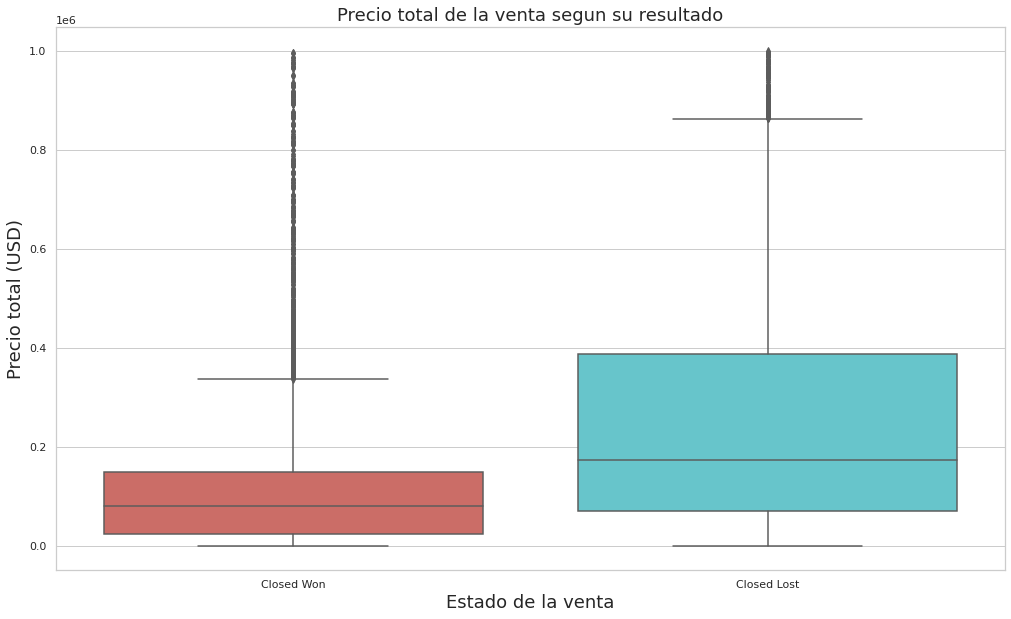

In [32]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
fig, g = plt.subplots(figsize=(17,10))
g = sns.boxplot(x="Stage", y="Total_Amount_Converted", 
                     data=casos_precio_final[casos_precio_final.Total_Amount_Converted<1000000], palette="hls")
g.set_title("Precio total de la venta segun su resultado", fontsize=18)
g.set_xlabel("Estado de la venta", fontsize=18)
g.set_ylabel("Precio total (USD)", fontsize=18)

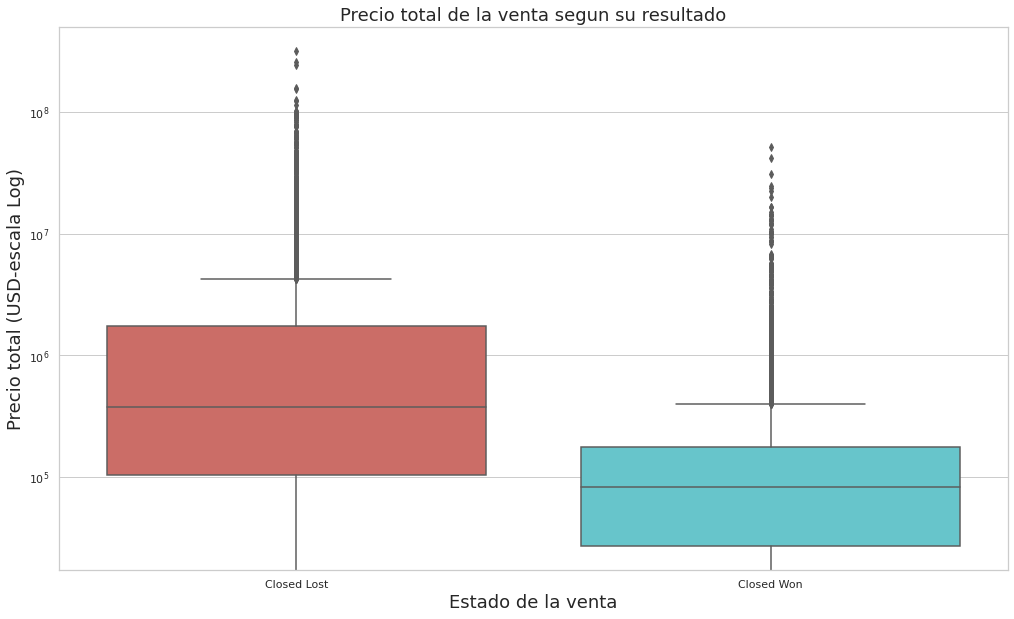

In [51]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
fig, g = plt.subplots(figsize=(17,10))
g = sns.boxplot(x="Stage", y="Total_Amount_Converted", 
                     data=casos_precio_final, palette="hls")
g.set_title("Precio total de la venta segun su resultado", fontsize=18)
g.set_xlabel("Estado de la venta", fontsize=18)
g.set_ylabel("Precio total (USD-escala Log)", fontsize=18)
g.set_yscale('log')

<ipython-input-59-d97dc5054058>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casos_precio_final['Total_Amount_Converted_log'] = np.log(casos_precio_final["Total_Amount_Converted"]+1)
/home/agustin/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Densidad')

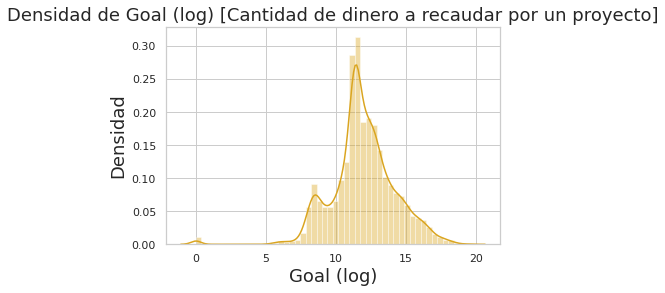

In [59]:
casos_precio_final['Total_Amount_Converted_log'] = np.log(casos_precio_final["Total_Amount_Converted"]+1)
g = sns.distplot(casos_precio_final["Total_Amount_Converted_log"], color='goldenrod')
g.set_title("Densidad de Goal (log) [Cantidad de dinero a recaudar por un proyecto]", fontsize=18)
g.set_xlabel("Goal (log)",fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

In [ ]:
# TODO referencias por color en la visualizacion
g = sns.distplot(failed['goal_log'], color='r')
g = sns.distplot(success['goal_log'], color='b')
g.set_title("Distribucion de Goal (log) de proyectos fallidos vs. exitosos", fontsize=18)
g.set_xlabel("Goal (log)",fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

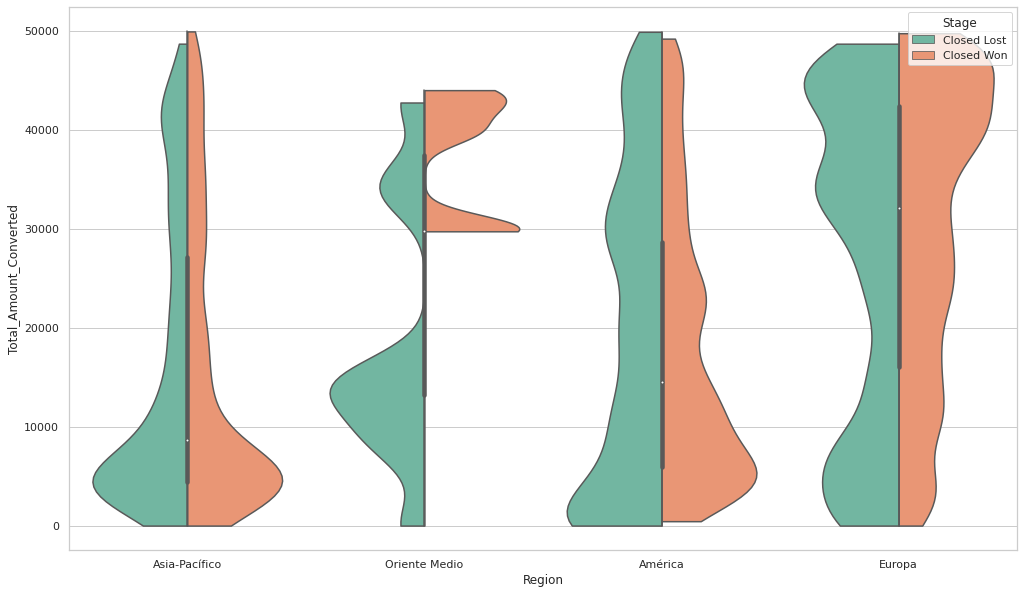

In [50]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(17,10))
ax = sns.violinplot(x="Region", y="Total_Amount_Converted", hue="Stage",
                    data=casos_precio_final[casos_precio_final.Total_Amount_Converted <50000],cut=0,\
                    palette="Set2", split=True,scale="width", bw=0.2)

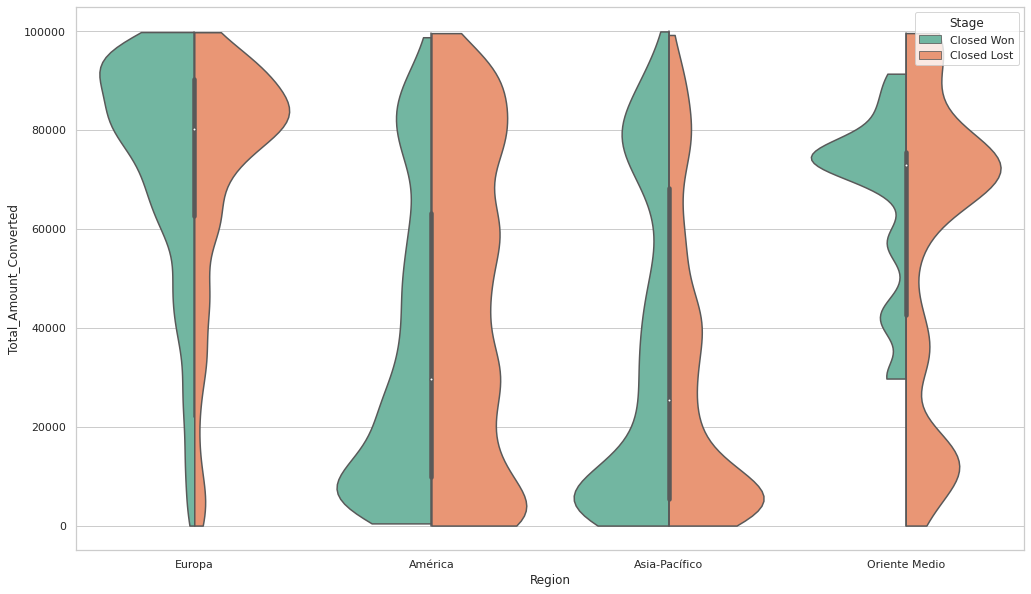

In [35]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(17,10))
ax = sns.violinplot(x="Region", y="Total_Amount_Converted", hue="Stage",
                    data=casos_precio_final[casos_precio_final.Total_Amount_Converted <100000],cut=0,\
                    palette="Set2", split=True,scale="width", bw=0.2)

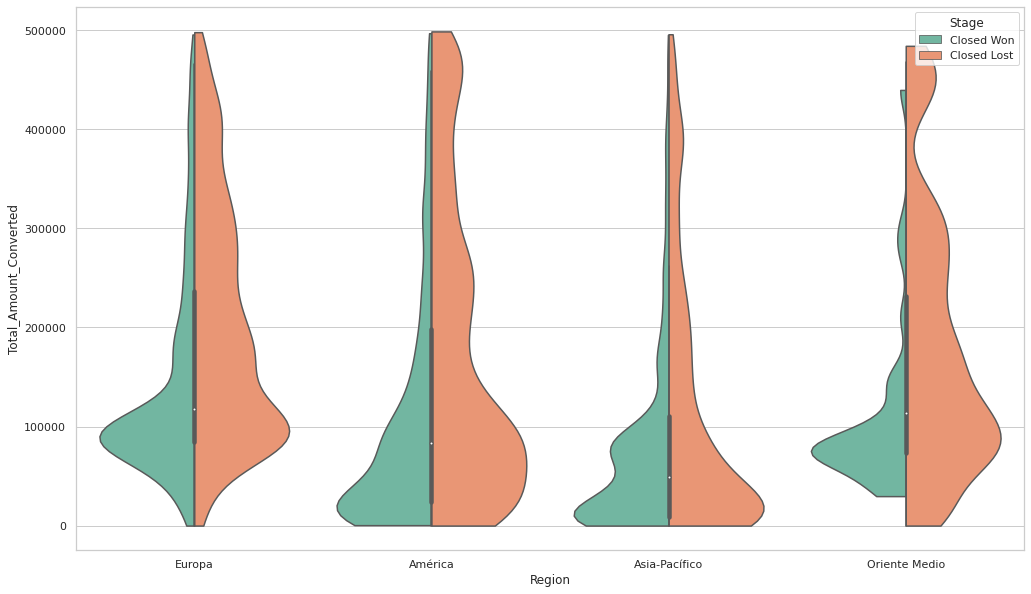

In [36]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(17,10))
ax = sns.violinplot(x="Region", y="Total_Amount_Converted", hue="Stage",
                    data=casos_precio_final[casos_precio_final.Total_Amount_Converted <500000],cut=0,\
                    palette="Set2", split=True,scale="width", bw=0.2)

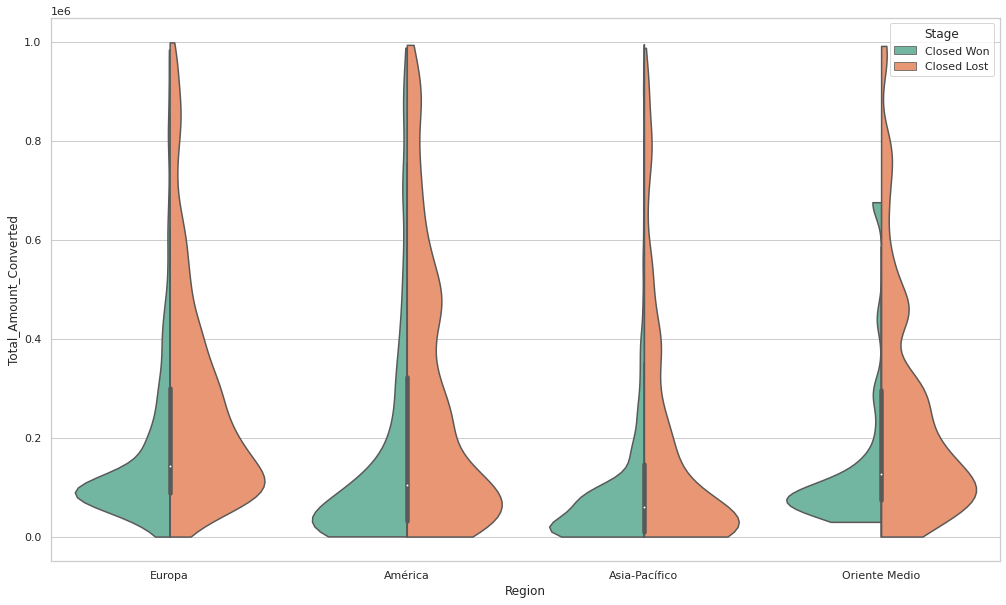

In [49]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(17,10))
ax = sns.violinplot(x="Region", y="Total_Amount_Converted", hue="Stage",
                    data=casos_precio_final[casos_precio_final.Total_Amount_Converted <1000000],cut=0,\
                    palette="Set2", split=True,scale="width", bw=0.2)


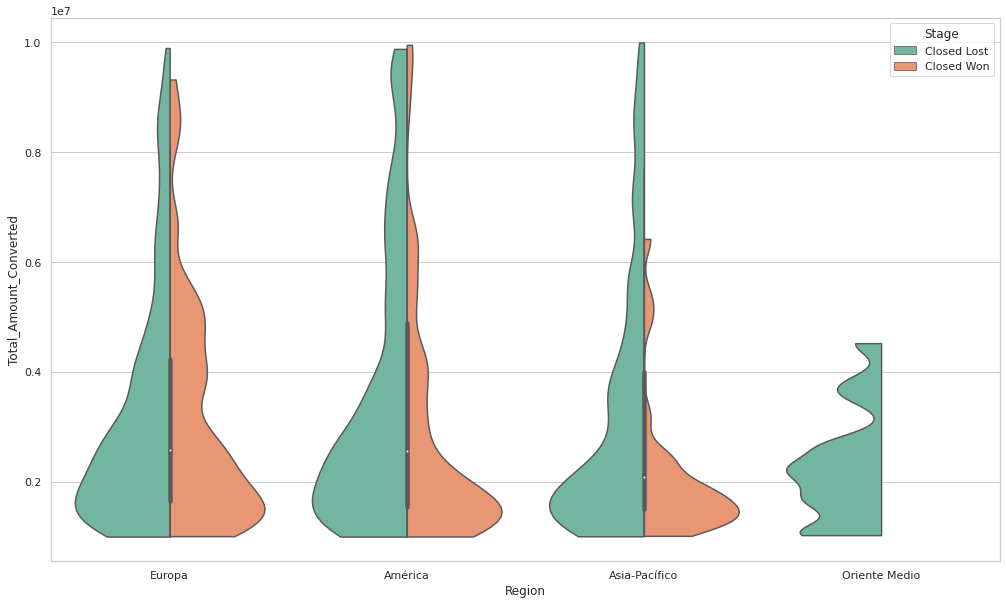

In [38]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(17,10))
ax = sns.violinplot(x="Region", y="Total_Amount_Converted", hue="Stage",
                    data=casos_precio_final[(casos_precio_final['Total_Amount_Converted'] >1000000)\
                    & (casos_precio_final['Total_Amount_Converted'] <10000000)],cut=0,\
                    palette="Set2", split=True,scale="width", bw=0.2)

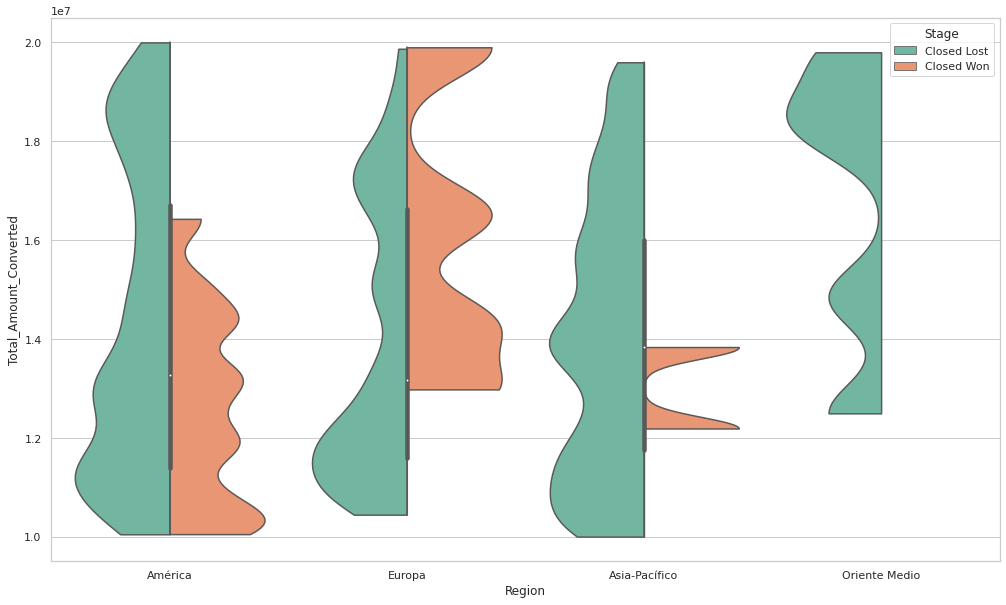

In [40]:
fig, ax = plt.subplots(figsize=(17,10))
ax = sns.violinplot(x="Region", y="Total_Amount_Converted", hue="Stage",
                    data=casos_precio_final[(casos_precio_final['Total_Amount_Converted'] >10000000) & (casos_precio_final['Total_Amount_Converted'] <20000000)],cut=0,\
                    palette="Set2", split=True,scale="width", bw=0.2)

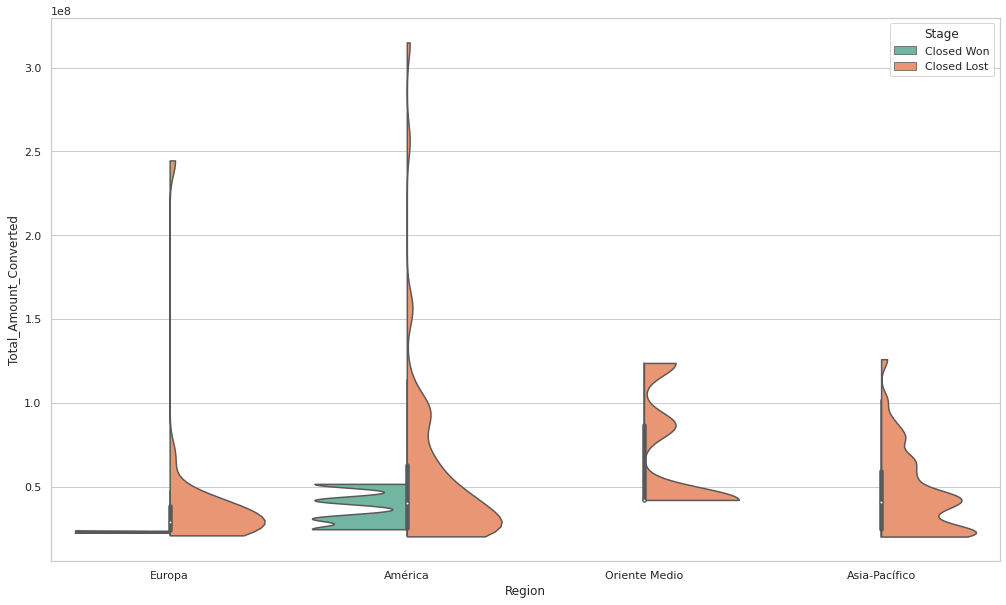

In [41]:
fig, ax = plt.subplots(figsize=(17,10))
ax = sns.violinplot(x="Region", y="Total_Amount_Converted", hue="Stage",
                    data=casos_precio_final[(casos_precio_final['Total_Amount_Converted'] >20000000)],cut=0,\
                    palette="Set2", split=True,scale="width", bw=0.2)

Text(0, 0.5, 'Regiones')

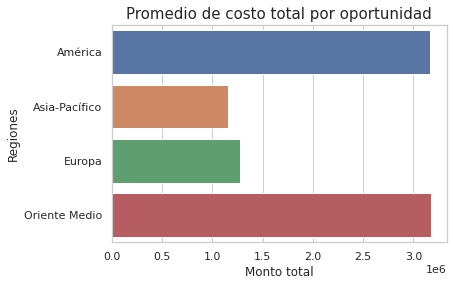

In [24]:
casos_total_amount_promedio_por_region = df_para_conversion.groupby('Region').agg({'Total_Amount_Converted':['mean']})
level0 = casos_total_amount_promedio_por_region.columns.get_level_values(0)
level1 = casos_total_amount_promedio_por_region.columns.get_level_values(1)
casos_total_amount_promedio_por_region.columns = level0 + '_'+ level1
casos_total_amount_promedio_por_region.reset_index(inplace= True)
casos_total_amount_promedio_por_region

g = sns.barplot(x=casos_total_amount_promedio_por_region.Total_Amount_Converted_mean,\
                y=casos_total_amount_promedio_por_region.Region, orient='h')
g.set_title("Promedio de costo total por oportunidad", fontsize=15)
g.set_xlabel("Monto total", fontsize=12)
g.set_ylabel("Regiones", fontsize=12)


In [25]:
precios = casos_cerrados['Price']
precios.describe()

count     16435
unique       53
top        None
freq      15546
Name: Price, dtype: object

In [26]:
df_price = casos_cerrados.groupby('Opportunity_ID').agg({'Price':[max]})
level0 = df_price.columns.get_level_values(0)
level1 = df_price.columns.get_level_values(1)
df_price.columns = level0
df_price.reset_index(inplace= True)
df_price['Price'].describe()

count     9791
unique      53
top       None
freq      9163
Name: Price, dtype: object

In [27]:
(precios == 'None').value_counts()

True     15546
False      889
Name: Price, dtype: int64

In [28]:
(precio_exitosos['Total_Amount'] == 0).value_counts()

NameError: name 'precio_exitosos' is not defined

In [ ]:
total_amount = precio_exitosos['Total_Amount']
total_amount.describe()

In [ ]:
precio_exitosos.loc[ precio_exitosos['Total_Amount'] == 0,]

In [ ]:
precio_exitosos = precio_exitosos.loc[precio_exitosos['Total_Amount'] != 0,]
(precio_exitosos['Total_Amount'] == 0).value_counts()

In [ ]:
maxTotalAmount=precio_exitosos['Total_Amount'].max()
maxTotalAmount

In [ ]:
minTotalAmount=precio_exitosos['Total_Amount'].min()
minTotalAmount

In [ ]:
rango1 = precio_exitosos.loc[(precio_exitosos['Total_Amount'] >1000000)]
rango2 = precio_exitosos.loc[(precio_exitosos['Total_Amount'] <= 1000000) & (precio_exitosos['Total_Amount'] > 500000),] 
rango3 = precio_exitosos.loc[(precio_exitosos['Total_Amount'] <= 500000) & (precio_exitosos['Total_Amount'] > 100000),] 
rango4 = precio_exitosos.loc[(precio_exitosos['Total_Amount'] <= 100000)] 

In [ ]:
# Control the number of bins
sns.distplot( precio_exitosos["Total_Amount"], bins= 10)
#sns.plt.show()

In [ ]:
# Control the number of bins
sns.distplot( rango1["Total_Amount"], bins=20 )
#sns.plt.show()

In [ ]:
rango1

In [ ]:
# Control the number of bins
sns.distplot( rango2["Total_Amount"], bins=20 )
#sns.plt.show()

In [ ]:
rango2

In [ ]:
# Control the number of bins
sns.distplot( rango3["Total_Amount"], bins=20 )
#sns.plt.show()

In [ ]:
rango3

In [ ]:
sns.distplot( rango4["Total_Amount"], bins=20)
#sns.plt.show()

In [ ]:
rango4